# Download CMIP5 from Copernicus Climate Data Store

In [1]:
import cdsapi

c = cdsapi.Client()

c.retrieve(
    'projections-cmip5-monthly-single-levels',
    {
        'variable':[
            '2m_temperature','mean_precipitation_flux'
        ],
        'model':'noresm1_m',
        'experiment':'historical',
        'ensemble_member':'r1i1p1',
        'period':'185001-200512',
        'format':'tgz'
    },
    'cmip5_sfc_monthly_1850-200512.zip')

2019-06-07 18:20:10,584 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/projections-cmip5-monthly-single-levels
2019-06-07 18:20:11,378 INFO Request is completed
2019-06-07 18:20:11,381 INFO Downloading http://136.156.132.105/cache-compute-0000/cache/data9/dataset-projections-cmip5-monthly-single-levels-f44286ff-5002-4beb-8ea5-91ce725c6499.zip to cmip5_sfc_monthly_1850-200512.zip (162M)
2019-06-07 18:20:28,718 INFO Download rate 9.3M/s


Result(content_length=169895511,content_type=application/zip,location=http://136.156.132.105/cache-compute-0000/cache/data9/dataset-projections-cmip5-monthly-single-levels-f44286ff-5002-4beb-8ea5-91ce725c6499.zip)

# Uncompress tarball
- If you select one variable, one experiment, one model, etc. then you get one file only and it is a netCDF file (even if it says otherwise!)
- As soon as you select more than one variable, or more than one experiment, etc. then you get a zip or tgz (depending on the format you chose)

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('cmip5_sfc_monthly_1850-200512.zip', 'r')
# extract all the files in the directory /opt/uio/GyHoCd/data/
zip_ref.extractall('/opt/uio/GyHoCd/data/cmip5/')
zip_ref.close()

# Open files
- we have two files:
    * pr_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc  
    * tas_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc

In [3]:
import xarray as xr

# use open_mfdataset to open several netCDF files 
dset = xr.open_mfdataset("/opt/uio/GyHoCd/data/cmip5/*.nc")
print(dset)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 144, time: 1872)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<shape=(1872, 2), chunksize=(1872, 2)>
    lat_bnds   (lat, bnds) float64 dask.array<shape=(96, 2), chunksize=(96, 2)>
    lon_bnds   (lon, bnds) float64 dask.array<shape=(144, 2), chunksize=(144, 2)>
    pr         (time, lat, lon) float32 dask.array<shape=(1872, 96, 144), chunksize=(1872, 96, 144)>
    tas        (time, lat, lon) float32 dask.array<shape=(1872, 96, 144), chunksize=(1872, 96, 144)>
Attributes:
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:           

# Get the list of variables

In [4]:
for varname, variable in dset.items():
    print(varname)

time_bnds
lat_bnds
lon_bnds
pr
tas


# Create a python dictionary with variable and long name

In [5]:
dict_variables = {}
for varname, variable in dset.items():
    if len(dset[varname].attrs) > 0:
        dict_variables[dset[varname].attrs['long_name']] = varname
print(dict_variables)
print(list(dict_variables.keys()))

{'Precipitation': 'pr', 'Near-Surface Air Temperature': 'tas'}
['Precipitation', 'Near-Surface Air Temperature']


# Select temperature (tas)
- two notations for accessing variables

In [6]:
dset.tas

<xarray.DataArray 'tas' (time: 1872, lat: 96, lon: 144)>
dask.array<shape=(1872, 96, 144), dtype=float32, chunksize=(1872, 96, 144)>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    original_name:     TREFHT
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2011-06-01T03:52:41Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [7]:
dset['tas']

<xarray.DataArray 'tas' (time: 1872, lat: 96, lon: 144)>
dask.array<shape=(1872, 96, 144), dtype=float32, chunksize=(1872, 96, 144)>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    original_name:     TREFHT
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2011-06-01T03:52:41Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

# Get attributes

In [8]:
dset['tas'].attrs['long_name']

'Near-Surface Air Temperature'

In [9]:
dset['tas'].attrs['units']

'K'

# Create a widget to select available variables

In [10]:
%matplotlib inline
import ipywidgets as widgets
select_variable = widgets.Select(
    options=['2m temperature', 'precipitation'],
    value='2m temperature',
    rows=2,
    description='Variable:',
    disabled=False
)

display(select_variable)

Select(description='Variable:', options=('2m temperature', 'precipitation'), rows=2, value='2m temperature')

# Create a widget to select date (year and month)

In [11]:
%matplotlib inline
import ipywidgets as widgets
select_date = widgets.Dropdown(
    options=dset.time.values.tolist(),
    rows=2,
    description='Date:',
    disabled=False
)

display(select_date)

Dropdown(description='Date:', options=(cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, 3, 16), cftime.Datetime…

# Create a function to generate a plot for a given date and given variable

In [12]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

def generate_plot(date, variable):
    
    fig = plt.figure(figsize=[12,5])

    # 111 means 1 row, 1 col and index 1
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))
    
    dset[variable].sel(time=date).plot(cmap='jet', 
                                      transform=ccrs.PlateCarree())
    ax.coastlines(color='white', linewidth=2.)


# Plot 2m temperature

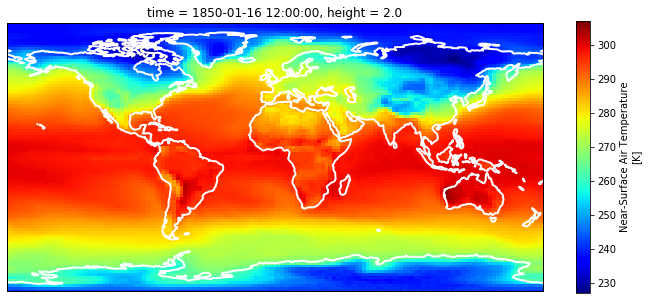

In [13]:
generate_plot(dset.time.values.tolist()[0], 'tas')

# Use widgets to plot the chosen variable at the chosen date

In [14]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# widget for variables
list_variables = list(dict_variables.keys())
select_variable = widgets.Select(
    options=list_variables,
    value=list_variables[0],
    rows=2,
    description='Variable:',
    disabled=False
)

# Widget for date
select_date = widgets.Dropdown(
    options=dset.time.values.tolist(),
    rows=2,
    description='Date:',
    disabled=False
)

# generate plot 
def generate_plot(date, variable):
    
    fig = plt.figure(figsize=[12,5])

    # 111 means 1 row, 1 col and index 1
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))
    
    dset[dict_variables[variable]].sel(time=date).plot(cmap='jet', 
                                      transform=ccrs.PlateCarree())
    ax.coastlines(color='white', linewidth=2.)


interact_plot = widgets.interact(generate_plot, date = select_date, variable = select_variable);

interactive(children=(Dropdown(description='Date:', options=(cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, 3…